In [7]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [8]:
te.login(); # Signup for a free API key at https://developer.tradingeconomics.com/

In [9]:
date_now = datetime.today().strftime('%Y-%m-%d')
 
data = te.fetchMarkets(symbol=['btcusd:cur', 'ethusd:cur','xrpusd:cur'], initDate='2019-01-01', endDate= date_now, output_type='df') 
print(data)

                symbol         open         high          low        close
2021-06-29  XRPUSD:CUR      0.64845      0.73303      0.64232      0.71821
2021-06-29  BTCUSD:CUR  34494.42000  36299.33984  34240.00000  36241.48047
2021-06-29  ETHUSD:CUR   1984.30005   2216.02002   1984.30005   2212.51001
2021-06-28  ETHUSD:CUR   1828.72998   2143.33008   1828.72998   2078.63000
2021-06-28  BTCUSD:CUR  34716.02000  35357.13000  33878.23000  34487.11000
...                ...          ...          ...          ...          ...
2019-01-02  ETHUSD:CUR    139.77000    156.80000    138.54000    154.52000
2019-01-02  BTCUSD:CUR   3825.41000   3918.67000   3770.00000   3885.87000
2019-01-01  BTCUSD:CUR   3693.85000   3845.46000   3629.66000   3823.44000
2019-01-01  ETHUSD:CUR    130.72000    141.25000    129.50000    138.64000
2019-01-01  XRPUSD:CUR      0.34830      0.36530      0.34390      0.36170

[2700 rows x 5 columns]


In [10]:
btcusd = data.loc[data['symbol'] == 'BTCUSD:CUR']
ethusd = data.loc[data['symbol'] == 'ETHUSD:CUR']
xrpusd = data.loc[data['symbol'] == 'XRPUSD:CUR']

btc = btcusd[['close']].rename(columns={'close': 'btcusd'})
btc.index.name = 'Date'
eth = ethusd[['close']].rename(columns={'close': 'ethusd'})
eth.index.name = 'Date'
xrp = xrpusd[['close']].rename(columns={'close': 'xrpusd'})
xrp.index.name = 'Date'

df = pd.merge(pd.merge(btc,eth, on='Date'),xrp, on='Date')


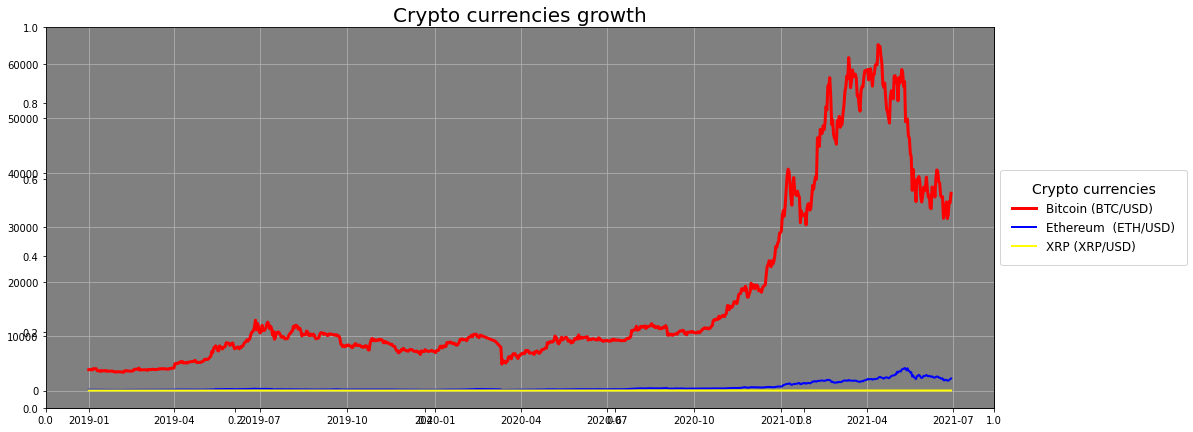

In [11]:
plt.subplots(figsize=(17, 7))
ax = plt.axes()
ax.set_facecolor("gray")

plt.plot( df.index.tolist(), df['btcusd'].values.tolist(),marker='', color='red', linewidth=3, label="Bitcoin (BTC/USD)")
plt.plot( df.index.tolist(), df['ethusd'].values.tolist(), marker='', color='blue', linewidth=2, label="Ethereum  (ETH/USD)")
plt.plot( df.index.tolist(), df['xrpusd'].values.tolist(), marker='', color='yellow', linewidth=2, label="XRP (XRP/USD)")


plt.legend(
          title="Crypto currencies",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)

plt.title("Crypto currencies growth", size=20)
plt.show()